<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/27_09_2020_Quize1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
weather = pd.read_csv("/content/Plant_1_Weather_Sensor_Data.csv")
weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [7]:
generation = pd.read_csv("/content/Plant_1_Generation_Data.csv",sep=',',error_bad_lines=False)
generation

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [8]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [9]:
datetimeCorrect = generation.DATE_TIME.str.contains('^[0-9]*-[0-9]*-[0-9]* [0-9]*:[0-9]*$', regex=True)
generation = generation[datetimeCorrect == True]

In [10]:
datetimeCorrect

0        True
1        True
2        True
3        True
4        True
         ... 
68773    True
68774    True
68775    True
68776    True
68777    True
Name: DATE_TIME, Length: 68778, dtype: bool

In [11]:
generation['DATE_TIME'] = pd.to_datetime(generation['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [12]:
generation

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [13]:
generation.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [14]:
generation.PLANT_ID.unique()

array([4135001])

In [15]:
generation.SOURCE_KEY.unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [16]:
weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [17]:
weather.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [18]:
weather.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [19]:
weather.PLANT_ID.unique()

array([4135001])

In [20]:
weather.SOURCE_KEY.unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [21]:
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'])

In [22]:
len(weather.DATE_TIME.unique())

3182

In [23]:
len(generation.DATE_TIME.unique())

3158

In [24]:
print(len(generation))

68778


In [25]:
merg_data = pd.merge(generation, weather, on='DATE_TIME')
merg_data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [26]:
merg_data.describe()

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774.0,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.0,68774.000000,68774.000000,68774.000000
mean,4135001.0,3147.177450,307.778375,3295.834644,6.978728e+06,4135001.0,25.558521,31.244997,0.232305
std,0.0,4036.441826,394.394865,3145.220597,4.162707e+05,0.0,3.361300,12.308283,0.301948
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,0.000000,0.000000,0.000000,6.512007e+06,4135001.0,22.724491,21.123944,0.000000
50%,4135001.0,428.571429,41.450000,2658.473214,7.146685e+06,4135001.0,24.670178,24.818984,0.031620
75%,4135001.0,6365.468750,623.561161,6274.000000,7.268751e+06,4135001.0,27.960429,41.693659,0.454880
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,4135001.0,35.252486,65.545714,1.221652


In [27]:
merg_data.isna().sum()

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [28]:
merg_data = merg_data.drop(['PLANT_ID_x','PLANT_ID_y','SOURCE_KEY_y'],axis=1)

In [29]:
merg_data

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [30]:
data_clean = merg_data.rename(columns = { 'SOURCE_KEY_x': 'SOURCE_KEY'}, inplace = False)

In [31]:
data_clean

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [34]:
print(f'min datetime: {data_clean.DATE_TIME.min()}')
print(f'max datetime: {data_clean.DATE_TIME.max()}')

min datetime: 2020-05-15 00:00:00
max datetime: 2020-06-17 23:45:00


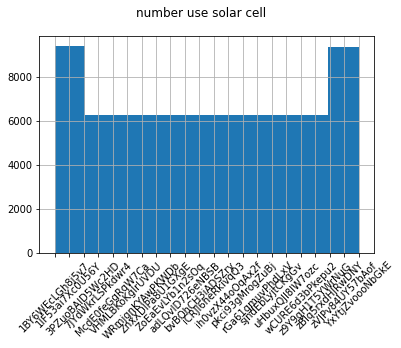

In [41]:
data_clean['SOURCE_KEY'].hist()
plt.suptitle('number use solar cell')
plt.xticks(rotation=45)
plt.show()

In [57]:
source_key = data_clean[['SOURCE_KEY','TOTAL_YIELD']].groupby("SOURCE_KEY").mean()
source_key

,TOTAL_YIELD
SOURCE_KEY,
1BY6WEcLGh8j5v7,6.377464e+06
1IF53ai7Xc0U56Y,6.313081e+06
3PZuoBAID5Wc2HD,7.117013e+06
7JYdWkrLSPkdwr4,7.728914e+06
McdE0feGgRqW7Ca,7.287580e+06
VHMLBKoKgIrUVDU,7.335465e+06
WRmjgnKYAwPKWDb,7.155458e+06
YxYtjZvoooNbGkE,7.307357e+06
ZnxXDlPa8U1GXgE,6.650663e+06


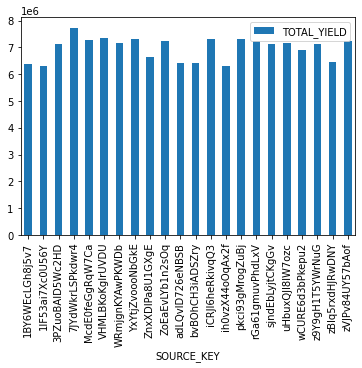

In [56]:
source_key.plot.bar()

In [ ]:
df_one_hot = pd.get_dummies(data_clean.SOURCE_KEY, prefix='source')
df_one_hot

,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_clean = pd.concat([data_clean,df_one_hot], axis=1)

In [ ]:
data_clean

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_clean = data_clean.drop(['SOURCE_KEY'],axis=1)

In [ ]:
data_clean

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
0,2020-05-15 00:00:00,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-05-15 00:00:00,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-05-15 00:00:00,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-05-15 00:00:00,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-05-15 00:00:00,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68772,2020-06-17 23:45:00,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_data = data_clean['TOTAL_YIELD']
y_data

0        6259559.0
1        6183645.0
2        6987759.0
3        7602960.0
4        7158964.0
           ...    
68769    7287002.0
68770    7028601.0
68771    7251204.0
68772    6583369.0
68773    7363272.0
Name: TOTAL_YIELD, Length: 68774, dtype: float64

In [ ]:
x_data = data_clean.loc[:,data_clean.columns != 'TOTAL_YIELD']

In [ ]:
x_data

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
0,2020-05-15 00:00:00,0.0,0.0,0.000,25.184316,22.857507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-05-15 00:00:00,0.0,0.0,0.000,25.184316,22.857507,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-05-15 00:00:00,0.0,0.0,0.000,25.184316,22.857507,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-05-15 00:00:00,0.0,0.0,0.000,25.184316,22.857507,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-05-15 00:00:00,0.0,0.0,0.000,25.184316,22.857507,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,0.0,0.0,5967.000,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,0.0,0.0,5147.625,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,0.0,0.0,5819.000,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68772,2020-06-17 23:45:00,0.0,0.0,5817.000,21.909288,20.427972,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# normalize
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
df_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)

TypeError: ignored